In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# The python3 is available in your machine
# Make sure the 'pima_diabetes.csv' file is in the same directory as your Python script or notebook.


# a) Read the dataset using pandas' DataFrame:
data = pd.read_csv('diabetes.csv')

# extra settings for show all data in console
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

# outpur
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [32]:
# b) Find the number of instances and features:
num_instances = data.shape[0]
num_features = data.shape[1]
print("b) Number of instances:", num_instances)  # ans: Number of instances: 768
print("b) Number of features:", num_features, end='\n\n')  # ans: Number of features: 9


b) Number of instances: 768
b) Number of features: 9



In [33]:
missing_entries = data.isnull().sum().sum()
if missing_entries == 0:
    print("c) The dataset has no missing entries.")
else:
    print("c) The dataset has", missing_entries, "missing entries.")

c) The dataset has no missing entries.


In [34]:
# d) Count the number of instances for each outcome value:
outcome_counts = data['Outcome'].value_counts()
print(f"Outcome_counts {outcome_counts}")

Outcome_counts Outcome
0    500
1    268
Name: count, dtype: int64


In [35]:
# e) Show the first 5 and last 5 instances:
first_instances = data.head(5)
last_instances = data.tail(5)
print("First 5 instances:\n", first_instances, end='\n\n')
print("Last 5 instances:\n", last_instances, end='\n\n')

First 5 instances:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

Last 5 instances:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180  32.9                     0.171   63        0
764            2      122             70             27        0  36.8              

In [36]:
# f) Check if missing entries are replaced by zeros:
zero_entries = (data == 0).sum().sum()
if zero_entries > 0:
    print("f) The dataset contains", zero_entries, "zero entries.")
else:
    print("f) The dataset does not have missing entries replaced by zeros.")

f) The dataset contains 1263 zero entries.


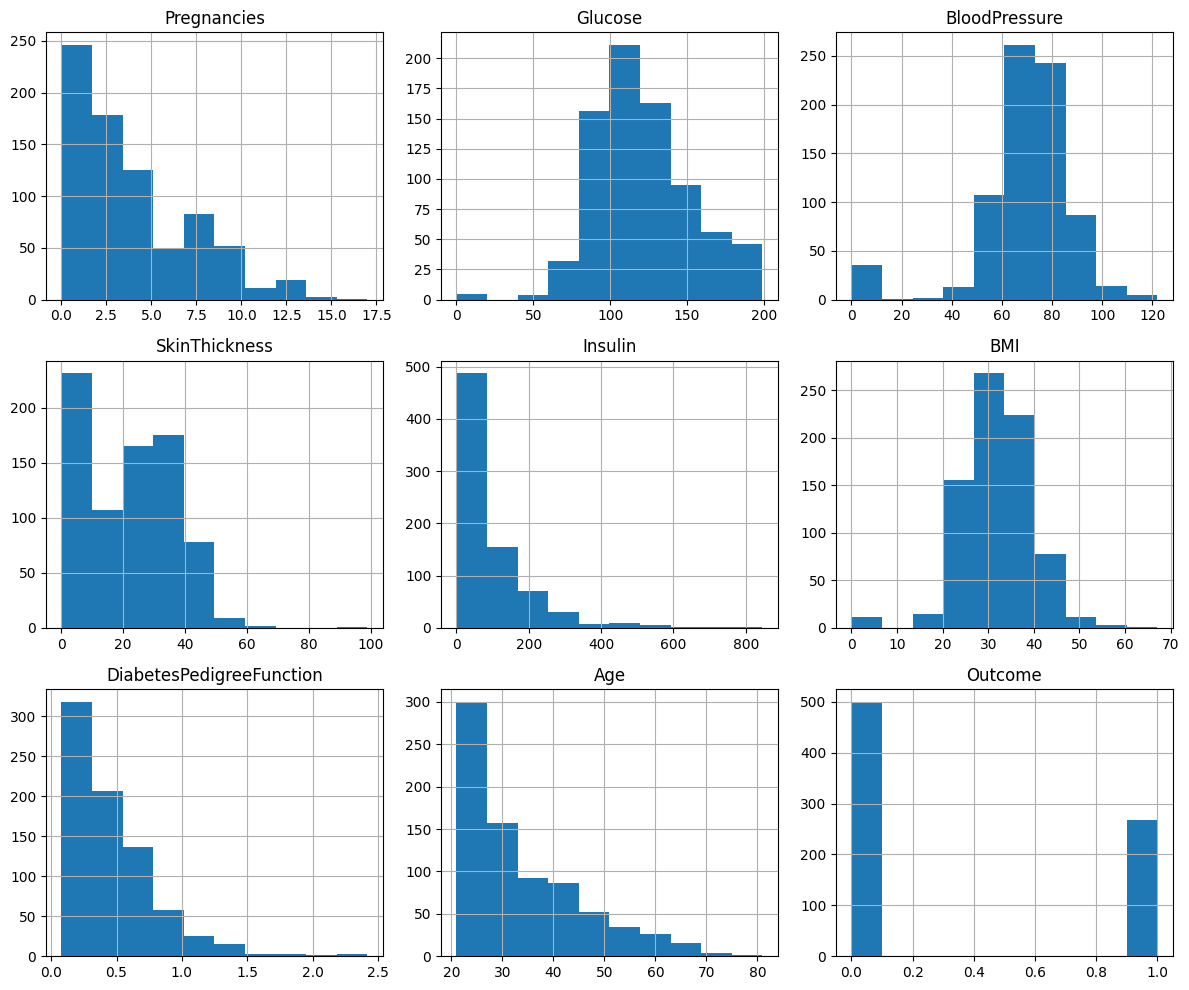

In [37]:
# g) Draw a histogram for each numerical feature:
# Select only the numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64'])

numerical_features.hist(bins=10, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [39]:
# h) Split the dataset into X and y:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

print(f"X {x}")
print(f"y {y}")
# Here, X contains all the predictors/features, and y contains the target class entries.

X      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
0              6      148             72             35        0  33.6                     0.627   50
1              1       85             66             29        0  26.6                     0.351   31
2              8      183             64              0        0  23.3                     0.672   32
3              1       89             66             23       94  28.1                     0.167   21
4              0      137             40             35      168  43.1                     2.288   33
5              5      116             74              0        0  25.6                     0.201   30
6              3       78             50             32       88  31.0                     0.248   26
7             10      115              0              0        0  35.3                     0.134   29
8              2      197             70             45      543  30.5          

In [40]:
# i) Split the dataset into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("X_train")
X_train

X_train


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
340,1,130,70,13,105,25.9,0.472,22
535,4,132,0,0,0,32.9,0.302,23
306,10,161,68,23,132,25.5,0.326,47
718,1,108,60,46,178,35.5,0.415,24
90,1,80,55,0,0,19.1,0.258,21


In [41]:
print("X_test")
X_test


X_test


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
204,6,103,72,32,190,37.7,0.324,55
97,1,71,48,18,76,20.4,0.323,22
336,0,117,0,0,0,33.8,0.932,44
568,4,154,72,29,126,31.3,0.338,37
148,5,147,78,0,0,33.7,0.218,65


In [42]:
print("y_train")
y_train

y_train


60     0
618    1
346    0
294    0
231    1
340    0
535    1
306    1
718    0
90     0
377    0
235    1
158    0
69     0
260    0
131    1
44     0
70     1
264    1
673    0
286    0
640    0
135    0
745    0
165    1
164    1
28     0
608    0
583    0
746    1
292    1
136    0
432    0
554    0
319    1
594    0
6      1
615    0
357    1
73     0
352    0
497    0
145    0
514    0
291    1
132    1
559    0
631    0
719    1
395    0
41     0
637    0
108    0
481    0
56     1
323    1
685    0
758    0
572    0
529    0
24     1
465    0
247    0
443    1
351    0
327    0
110    1
82     0
51     0
449    0
762    0
703    0
619    1
198    1
538    0
329    0
302    0
334    0
139    0
485    1
547    0
18     0
593    0
140    0
326    1
266    1
626    0
83     0
61     1
632    0
735    0
29     0
335    0
599    0
557    0
311    0
429    1
182    0
586    1
679    0
464    0
223    0
393    0
766    1
570    0
671    0
412    0
755    1
176    0
525    0
333    0
1

In [43]:
print("y_test")
y_test

y_test


668    0
324    0
624    0
690    0
473    0
204    0
97     0
336    0
568    0
148    0
667    1
212    0
199    1
265    0
760    0
356    1
501    0
457    0
604    1
213    1
636    0
544    0
86     0
208    0
281    0
209    1
581    0
639    0
328    1
431    0
120    1
363    1
425    1
300    1
67     0
338    1
579    1
66     1
582    0
78     1
482    0
456    0
30     0
635    1
33     0
31     1
39     1
77     0
299    0
487    0
629    0
516    1
375    1
451    1
511    0
234    0
361    0
494    0
692    0
404    1
754    1
764    0
519    0
254    1
483    0
211    0
210    0
84     1
239    0
409    1
54     0
720    0
512    0
109    1
587    0
362    0
734    0
396    0
528    0
10     0
192    1
448    1
174    0
428    0
181    0
748    1
155    1
309    1
65     0
331    0
137    0
350    0
81     0
468    1
405    0
470    0
250    0
490    0
220    1
76     0
548    0
290    0
72     1
244    0
394    1
620    0
63     0
716    1
659    1
314    1
118    0
7

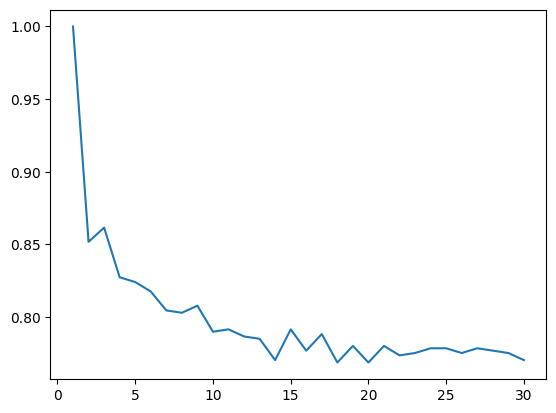

In [44]:
# j) Apply the KNN classifier with the Euclidean distance metric and 
# determine the suitable value of the hyperparameter k:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Determine suitable k value
train_accuracy = []
test_accuracy = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    train_accuracy.append(knn.score(X_train_scaled, y_train))
    test_accuracy.append(knn.score(X_test_scaled, y_test))

# Plot train and test accuracy with respect to k
plt.plot(k_values, train_accuracy, label='Train Accuracy')
plt.show()


